# 1. 数据预处理

## 1.1 导入包

In [1]:
# -*- coding: utf-8 -*-
"""
Python 3.7.7
sklearn 0.23.1
使用 Kernel PCA 对糖尿病数据集降维
"""

# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 1.2 导入数据集

In [2]:
# 导入数据集
dataset = pd.read_csv('pima-indians-diabetes.csv')
print(dataset.shape)

(768, 9)


## 1.3 检测缺失值

In [3]:
# 检测缺失值
null_df = dataset.isnull().sum()
print(null_df)

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


## 1.4 生成自变量和因变量

In [4]:
# 生成自变量和因变量
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values

## 1.5 拆分训练集和测试集

In [5]:

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)

(614, 8)


## 1.6 特征缩放

In [6]:
# 特征缩放
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 2. 使用 Kernel PCA 生成新的自变量

In [7]:
# 使用 Kernel PCA 生成新的自变量
kernel_pca = KernelPCA(n_components = 2, kernel='rbf') # 自变量的个数假定是2
X_train_kernel_pca = kernel_pca.fit_transform(X_train)
X_test_kernel_pca = kernel_pca.transform(X_test)
print(X_train_kernel_pca)

[[-0.41447464  0.30891061]
 [-0.32435856  0.12212701]
 [-0.21922571  0.19870539]
 ...
 [-0.43415449 -0.15377693]
 [-0.19969351 -0.06024013]
 [-0.32111583  0.03513278]]


#### n_components的值需要不断尝试

# 3. 构建逻辑回归模型

## 3.1 使用原始数据构建逻辑回归模型

In [8]:
# 构建模型
classifier = LogisticRegression(penalty='l2', C=1, class_weight='balanced', random_state = 0)
classifier.fit(X_train, y_train)

# 预测测试集
y_pred = classifier.predict(X_test)

# 评估模型性能
print(accuracy_score(y_test, y_pred))

0.7922077922077922


## 3.2 使用降维后数据构建逻辑回归模型

In [9]:
# 构建模型
classifier = LogisticRegression(penalty='l2', C=1, class_weight='balanced', random_state = 0)
classifier.fit(X_train_kernel_pca, y_train)

# 预测测试集
y_pred = classifier.predict(X_test_kernel_pca)

# 评估模型性能
print(accuracy_score(y_test, y_pred))

0.7402597402597403


#### 降维后，模型性能下降了。

# 4. 可视化Kernel PCA降维效果

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


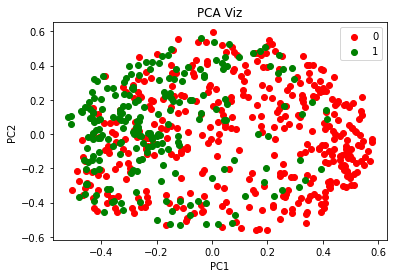

In [10]:
X_set, y_set = X_train_kernel_pca, y_train
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('PCA Viz')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

经过Kernel PCA降维，自变量由8个变为2个。 将降维后的2个主成分可视化，可以看到，如果以2个主成分训练逻辑回归模型，模型性能会较差，因为肉眼可见，2个类别之间没有明显的界限。不过效果也比PCA好一些。